# Исследование продаж автомобилей в Казахстане

## Описание данных

`Год` – год продажи (2019)

`Месяц` – месяц продажи (январь - сентябрь)

`Компания` – название автоцентра

`Бренд` – название продаваемой марки автомобиля

`Модель` – название модели автомобиля

`Год выпуска` – год производства автомобиля

`Страна-производитель` – страна, где произведен автомобиль

`Вид топлива` – бензин, дизель, электричество, гибрид

`Объём двиг л` – объем двигателя автомобиля в литрах

`Коробка передач` – тип коробки переключения передач (оставляем два варианта: автоматическая, механическая, то есть все что не механика ставим автомат, на DSG, S-Tronic и прочее делить не надо, равно как и количество передач)

`Тип привода` – в итоге оставляем RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное (подключаемый полный привод и где нет четкого указания передний или задний это привод)

`Регион` – регион продажи

`Количество` – количество автомобилей в заказе

`Цена USD` – цена автомобиля

`Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)

`Область` – область продажи

`Сегментация 2013` – сегмент автомобиля актуальный

`Класс 2013` – класс автомобиля актуальный

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

### Загрузка файла

In [2]:
data = pd.read_csv('kz_2019_final_all_dirt.csv', decimal=',', index_col=0, low_memory=False)

In [3]:
print('Число строк:', len(data))
data.head()

Число строк: 32854


,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,безналичный,1.0,31250.0,31250.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,30581.0,30581.0,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,35087.719,35087.719,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,26608.232900297386,26608.232900297386,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,безналичный,1.0,48343.98264845536,48343.98264845536,г.Алматы,Легковые автомобили,D класс,D,Импорт


### Переименование столбцов

Во-первых, удалим колонки, которые не участвуют в анализе

In [4]:
data = data.drop(['Модификация', 'Сегмент', 'Наименование дилерского центра', 'Тип клиента', 'Форма расчета', 
                  'Сегментация Eng', 'Локализация производства'], axis=1)

Во-вторых, приведем названия столбцов в удобный формат

In [5]:
data.columns = (data.columns.str.lower()
               .str.replace(',', '')
               .str.replace('-', '_')
               .str.replace(' ', '_')
               )
print(data.columns)

Index(['год', 'месяц', 'компания', 'бренд', 'модель', 'год_выпуска',
       'страна_производитель', 'вид_топлива', 'объём_двиг_л',
       'коробка_передач', 'тип_привода', 'регион', 'количество', 'цена_usd',
       'продажа_usd', 'область', 'сегментация_2013', 'класс_2013'],
      dtype='object')


### Анализ пропусков

In [6]:
# drive_type = data[data['вид_топлива'].isna()]
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value = pd.DataFrame({'column_name': data.columns,
                              'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
год,год,0.000000
месяц,месяц,0.000000
компания,компания,0.000000
бренд,бренд,0.000000
модель,модель,0.000000
год_выпуска,год_выпуска,0.468740
страна_производитель,страна_производитель,0.000000
вид_топлива,вид_топлива,2.775918
объём_двиг_л,объём_двиг_л,5.740549
коробка_передач,коробка_передач,3.628173


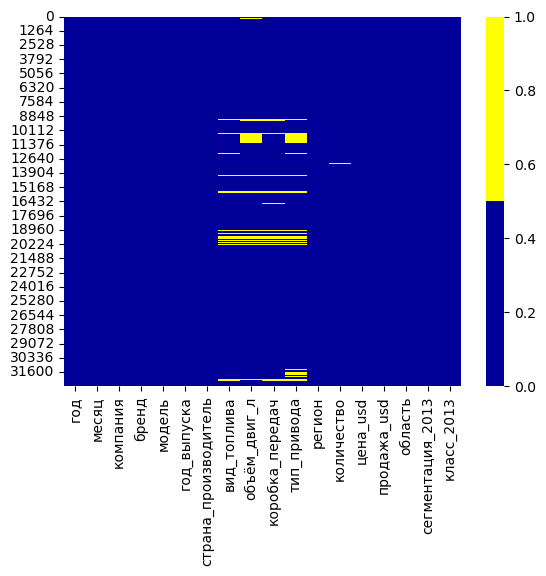

In [7]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isna(), cmap=sns.color_palette(colors))
plt.show()

Есть много строк с пропусками сразу в нескольких столбцах. При этом общее число строк с пропусками не такое большое, поэтому, чтобы до старости не вставлять значения по модели автомобиля, пропуски удалим.

In [8]:
data = data.dropna()
len(data)

30214

### Дубликаты

In [9]:
data.duplicated().sum()

15600

Почти половина строк дубликаты, однако для рынка автомобилей это нормальное явление, комплектации могут быть схожи. По VIN номерам, которые в датасете отсутсвуют из соображений конфиденциальности, дубликаты не обнаружены.

### Кодировка стран
Перекодируем страны в столбце Страна производства в alpha3(RUS, KAZ, USA и т.д.)

In [10]:
# посмотрим, какие страны присутствуют в столбце
data['страна_производитель'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Австрия', 'Нидерланды', 'Венгрия',
       'Швеция'], dtype=object)

In [11]:
# Используем метод pd.read_html для извлечения данных с кодировкой с сайта в ноутбук
type(pd.read_html('https://www.artlebedev.ru/country-list/',
encoding='utf8'))

list

In [12]:
# смотрим первый элемент списка
type(pd.read_html('https://www.artlebedev.ru/country-list/',
encoding='utf8')[0])

pandas.core.frame.DataFrame

Делаем датасет с кодами стран путем загрузки данных с сайта Лебедева, одновременно
переименуем столбцы на английский язык для удобства работы

In [13]:
countries_codes = (pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0]
                   [['Наименование', 'Полное наименование', 'Alpha3']]
                  .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'}))

Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран,
значения - коды. Я циклом прошел по названиям и полным названиям стран, так как в
датасете есть и полные названия стран также.

In [14]:
countries_codes_dict = {}

for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
        
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

Производим замену по словарю. Можно использовать метод map, но у него есть один
недочет - если в словаре нет значения, которое стоит в ячейке, то метод вернет nan, что в
данном случае неприменимо. Поэтому используем метод словарей get и lambda-функцию.
Данный способ вернет нам значение ячейки, если ее нет в ключах словаря

In [15]:
data['страна_производитель'] = data['страна_производитель'].apply(lambda cell: countries_codes_dict.get(cell, cell))
data['страна_производитель'].unique()

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'],
      dtype=object)

Три страны не изменились, переименуем вручную

In [16]:
data['страна_производитель'] = (data['страна_производитель'].str.replace('США', 'USA')
                                .str.replace('Корея', 'KOR')
                                .str.replace('Белоруссия', 'BLR'))
data['страна_производитель'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'AUT', 'NLD', 'HUN', 'SWE'], dtype=object)

Однако, по правилам хорошего тона после себя необходимо оставить словарь, по которому
были произведены замены / кодировка, поэтому мы поменяем названия ключей стран,
которые не прошли замену. Я для этого использовал метод словарей pop

In [17]:
new_codes_dict = countries_codes_dict

new_codes_dict['Белоруссия'] = new_codes_dict.pop('Беларусь')
new_codes_dict['США'] = new_codes_dict.pop('Соединенные Штаты')
new_codes_dict['Корея'] = new_codes_dict.pop('Корея, Республика')

### Кодировка типа топлива

In [18]:
data['вид_топлива'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', 'дизель ',
       'Газовый'], dtype=object)

In [19]:
data['вид_топлива'] = (data['вид_топлива'].str.replace('Бензин', 'F')
                       .str.replace('Дизель', 'D')
                       .str.replace('дизель ', 'D')
                       .str.replace('Электрический', 'E')
                       .str.replace('гибрид', 'HYB')
                       .str.replace('Газовый', 'G')
                      )
print(data['вид_топлива'].unique())

['F' 'D' 'HYB' 'E' 'G']


### Кодировка типа привода

In [20]:
data['тип_привода'].unique()

array(['FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD', 'Полный',
       'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ', 'задний', '2WD',
       '2 WD', '4 WD', '4х4', '4x2', 'FR', '4х2', '4x4', '2х4', 'CVT',
       '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion', 'передний '],
      dtype=object)

In [21]:
def drive_encoding(drive):
    if drive in ['quattro', 'Quattro', '4WD', 'Полный', 'AWD', '4 WD', '4х4', '4x4', 'полный', '4Motion']:
        return '4WD'
    elif drive in ['FWD', 'передний', 'Передний', 'FF', 'передний ']:
        return 'FWD'
    elif drive in ['RWD', 'Задний', 'задний']:
        return 'RWD'
    else:
        return '2WD'

data['тип_привода'] = data['тип_привода'].apply(drive_encoding) 
print(data['тип_привода'].unique())

['FWD' '4WD' 'RWD' '2WD']


### Столбец Дата

In [22]:
# создадим отдельный столбей с датой
print(data['месяц'].unique())

['Май' 'Июнь' 'Июль' 'Январь' 'Февраль' 'Март' 'Апрель' 'Август'
 'Сентябрь']


In [23]:
month_dict = {'Январь': '01',
             'Февраль': '02',
             'Март': '03',
             'Апрель': '04',
             'Май': '05',
             'Июнь': '06',
             'Июль': '07',
             'Август': '08',
             'Сентябрь': '09'}
data['месяц'] = data['месяц'].map(month_dict)

In [24]:
data['год'] = data['год'].astype('str') + '-' + data['месяц']
data = data.rename(columns = {'год': 'дата'})
data = data.drop('месяц', axis=1)
data['дата'] = pd.to_datetime(data['дата'], format='%Y-%m')

### Название компании

In [25]:
data['компания'].value_counts()

Toyota Motor Kazakhstan          10425
Astana Motors                     5744
БИПЭК АВТО                        3358
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1304
Nissan Manufacturing RUS          1022
Renault Россия                     633
Mercur Auto                        597
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  197
Каспиан Моторс                     168
Autokapital                         97
MMC RUS                             33
Хино Моторс Казахстан               31
Hyundai Com Trans Kazakhstan        26
Eurasia Motor Premium               24
СВС                                 24
Scandinavian Motors                 22
ТК Рос-Авто                         15
Caspian Motors                      15
Daewoo Bus Kazakhstan               15
Sivi Finance Consulting              4
Scania Central Asia      

In [26]:
data['компания'] = (data['компания'].str.replace('MMC RUS', 'ММС Рус')
                    .str.replace('Caspian Motors', 'Каспиан Моторс')
                    .str.replace('Hino Motors Kazakhstan', 'Хино Моторс Казахстан'))

### Объем двигателя

In [27]:
data['объём_двиг_л'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', '0', '1.8', '1.596', '1596',
       '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '10.3', '8.7', '1600', '1.998', '1.598', '1.248', '2.359', '2359',
       '1999', '3.8', '3800', '1.591', '1.368', '3.342', '3.47', '3470',
       '2000', '1.999', '1.69', '1690', '1.774', '1598', '1774', '4.6',
       '3,5', '5.7', '10.5', '4', '12', '1.2', '3.6', '6.5', '5.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '1400',
       '2.3', '1.33', '2,4G', '2.693', '2693', '2.235', '2235', '2.0',
       '14860', '14.8', '6.7', '1,2T', '4.88', '4.0'], dtype=object)

In [28]:
data['объём_двиг_л'] = data['объём_двиг_л'].str.replace(',', '.')

def cleaner_engine(volume):
    new_volume = re.sub(r'[^\d.]', '', volume)
    
    return new_volume

data['объём_двиг_л'] =  data['объём_двиг_л'].apply(cleaner_engine)

In [29]:
data['объём_двиг_л'] = data['объём_двиг_л'].astype('float')

def super_cleaner_engine(volume):
    if volume > 1000:
        return volume / 1000
    elif volume < 0.1:
        return volume * 1000
    else:
        return volume
data['объём_двиг_л'] =  data['объём_двиг_л'].apply(super_cleaner_engine)

print(data[(data['объём_двиг_л'] != 0)].describe())

       объём_двиг_л
count  30213.000000
mean       2.265391
std        0.937653
min        1.200000
25%        1.600000
50%        2.000000
75%        2.693000
max       16.000000


### Регион и область

In [30]:
print(data['регион'].unique())
data['регион'] = data['регион'].str.title()

['Алматы' 'Костанай' 'Атырау' 'Астана' 'Уральск' 'Усть-Каменогорск'
 'Петропавловск' 'Павлодар' 'Кокшетау' 'Актау' 'Семей' 'Караганда'
 'Актобе' 'Шымкент' 'Талдыкорган' 'Кызылорда' 'Экибастуз' 'Рудный' 'Тараз'
 'Аксай' 'Щучинск' 'ЭКСПОРТ' 'Риддер']


In [31]:
print(data['область'].unique())

['г.Алматы' 'Костанайская область' 'Атырауская область' 'г.Астана'
 'Западно-Казахстанская область' 'Восточно-Казахстанская область'
 'Северо-Казахстанская область' 'Павлодарская область'
 'Акмолинская область' 'Мангистауская область' 'Карагандинская область'
 'Актюбинская область' 'Южно-Казахстанская область' 'Алматинская область'
 'Кызылординская область' 'Жамбылская область' 'Экспорт область']


### Год выпуска

In [32]:
data['год_выпуска'].unique()

array(['2018', '2017', '2016', '2011', '2015', '2014', '2013', '2\xa0018',
       '2\xa0017', '2\xa0016'], dtype=object)

In [33]:
data['год_выпуска'] = data['год_выпуска'].str.replace('\xa0', '')

### Тип трансмиссии

In [34]:
data['коробка_передач'].unique()

array(['S-Тronic', 'S-Тroic', 'S-troic', 'S-tronic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '6 МТ',
       '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', '9AT',
       'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT',
       '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП',
       '8-ступ АКПП', 'АКПП8', '8', 'АКПП', ' -', '-', '7 DSG', '7DSG',
       '6 DSG', '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ (механика)', 'Механическая'], dtype=object)

In [35]:
mechanical = ['5 МТ', '5MT', '5МТ', 'MT', 'МТ', 'MТ', '6MT', '6МТ', '6MТ',
           'Мех.', 'МКПП', '6 MT', '6 МТ', 'N', '6М/Т', '6M/T', '6M/Т', '5MТ',
           '5M', '5М', '5-ступМТ',  'МТ (механика)', 'Механическая', '0']


def transmission_clean(value):
    if value in mechanical:
        return 'МКПП'
    else:
        return 'АКПП'
    
data['коробка_передач'] = data['коробка_передач'].apply(transmission_clean)
data['коробка_передач'].unique()

array(['АКПП', 'МКПП'], dtype=object)

### Изменение типа данных

In [36]:
float_list = ['цена_usd', 'продажа_usd']
category_list = ['вид_топлива', 'коробка_передач', 'тип_привода', 'сегментация_2013', 'класс_2013']
for column in data.columns:
    
    if column in float_list:
        data[column] = data[column].astype('float')
        
    elif column in category_list:
        data[column] = data[column].astype('category')

    else: 
        data[column] = data[column]
        
        
data['количество'] = pd.to_numeric(data['количество'], errors='coerce', downcast = 'integer')       

## Исследовательский анализ

In [37]:
data.head()

,дата,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,область,сегментация_2013,класс_2013
1,2019-05-01,Mercur Auto,Audi,A3,2018,DEU,F,1.4,АКПП,FWD,Алматы,1,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс
2,2019-06-01,Mercur Auto,Audi,A3,2018,DEU,F,1.4,АКПП,FWD,Алматы,1,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс
3,2019-07-01,Mercur Auto,Audi,A3,2017,DEU,F,1.4,АКПП,FWD,Алматы,1,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс
4,2019-07-01,Mercur Auto,Audi,A4,2017,DEU,F,2.0,АКПП,4WD,Алматы,1,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс
5,2019-06-01,Mercur Auto,Audi,A5,2017,DEU,F,2.0,АКПП,4WD,Алматы,1,52760.736196,52760.736196,г.Алматы,Легковые автомобили,Спортивные автомобили


In [38]:
marks = (data.groupby('бренд')[['количество', 'продажа_usd']]
            .agg('sum').sort_values(by='количество', ascending=False)
            .reset_index()
           )

In [39]:
def chart(table, brand, amount, sales):
    
    plt.figure(figsize=(14, 5))

    ax1 = plt.subplot(1, 2, 1)

    sns.barplot(data=table.sort_values(by=amount, ascending=False).head(10), x=amount, y=brand)
    plt.title('Топ 10 марок в натуральном выражении')
    plt.xlabel('Количество проданных автомобилей')
    plt.ylabel('Бренд')

    ax2 = plt.subplot(1, 2, 2)

    sns.barplot(data=table.sort_values(by=sales, ascending=False).head(10), x=sales, y=brand)
    plt.title('Топ 10 марок в денежном выражении')
    plt.xlabel('Объём продаж, 100 млн $')
    plt.ylabel('Бренд')
    
    plt.show()

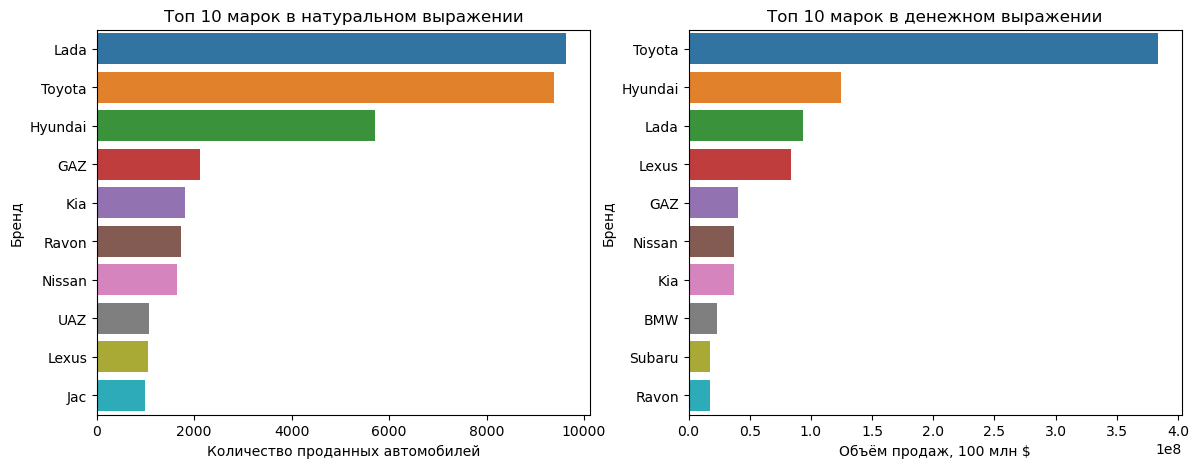

In [40]:
chart(marks, 'бренд', 'количество', 'продажа_usd')